In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv("/home/jishnu/Desktop/ Data_Sets/synthetic_dataset.csv")

In [3]:
df = data.copy()

In [4]:
df.head()

,Category,Price,Rating,Stock,Discount
0,NaN,5548.0,1.870322,NaN,0.0
1,NaN,3045.0,4.757798,NaN,38.0
2,NaN,4004.0,NaN,In Stock,0.0
3,NaN,4808.0,1.492085,NaN,33.0
4,NaN,1817.0,NaN,Out of Stock,23.0


In [5]:
df.shape

(4362, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4362 entries, 0 to 4361
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  1614 non-null   object 
 1   Price     4188 non-null   float64
 2   Rating    2312 non-null   float64
 3   Stock     3010 non-null   object 
 4   Discount  3970 non-null   float64
dtypes: float64(3), object(2)
memory usage: 170.5+ KB


In [7]:
df.isnull().sum()

Category    2748
Price        174
Rating      2050
Stock       1352
Discount     392
dtype: int64

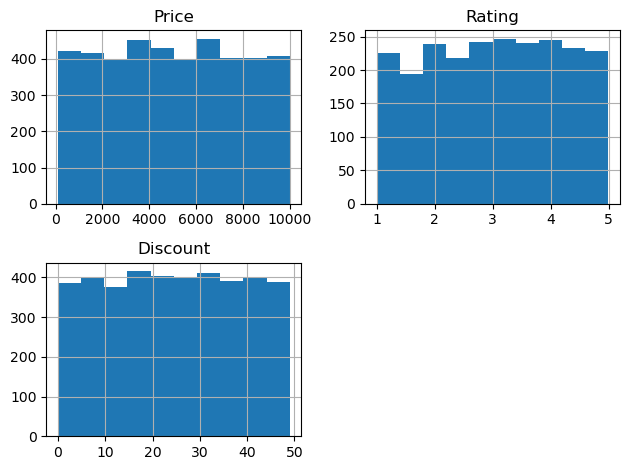

In [8]:
col1 = df.select_dtypes("float")
col1.hist()
plt.title(col1.columns)
plt.tight_layout()
plt.show()

### Null Value Handling

In [9]:
col2 = df.select_dtypes("object")
c1 = ["Price","Discount"]

df["Rating"] = df["Rating"].fillna(df["Rating"].mean())

for i in c1:
    df[i] = df[i].fillna(df[i].median())

for j in col2:
    df[j] = df[j].fillna(df[j].mode()[0])

df.isnull().sum()

Category    0
Price       0
Rating      0
Stock       0
Discount    0
dtype: int64

### Outlier Removal

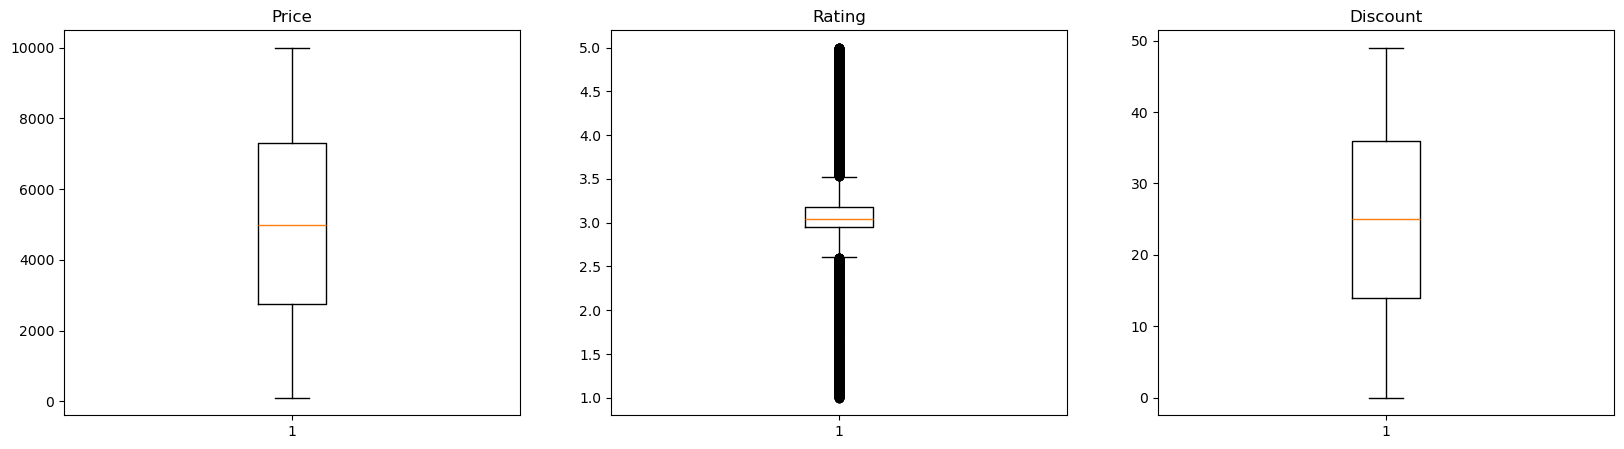

In [10]:
fig,axs = plt.subplots(1,3, figsize = (20,5))

for i in range(3):
    axs[i].boxplot(df[col1.columns[i]])
    axs[i].set_title(col1.columns[i])
plt.show()

In [11]:
Q1 = np.percentile(df["Rating"],25,method = "midpoint")
Q3 = np.percentile(df["Rating"],75,method = "midpoint")

IQR = Q3 - Q1
upper = Q3 + 1.5 * IQR
lower = Q1 - 1.5 * IQR
outlier = df[(df["Rating"] > upper)| (df["Rating"] < lower)]
outlier_list = outlier["Rating"].tolist()
outlier.head()

,Category,Price,Rating,Stock,Discount
0,C,5548.0,1.870322,In Stock,0.0
1,C,3045.0,4.757798,In Stock,38.0
3,C,4808.0,1.492085,In Stock,33.0
6,C,667.0,3.668341,In Stock,41.0
7,A,7125.0,4.983998,Out of Stock,7.0


In [12]:
print(f"{Q1},q3={Q3}")

2.949315838066082,q3=3.1800210516748812


In [13]:
df["Rating"].describe()

count    4362.000000
mean        3.038293
std         0.832111
min         1.000366
25%         2.949071
50%         3.038293
75%         3.180129
max         4.997818
Name: Rating, dtype: float64

In [14]:
df = df[(df["Rating"] >= lower) & (df["Rating"] <= upper)]

In [15]:
outlier = df[(df["Rating"] > upper)| (df["Rating"] < lower)]
outlier_list = outlier["Rating"].tolist()
df.reset_index(drop = True, inplace =True)
outlier_list

[]

### Onehot Encoding

In [16]:
df1 = df.copy()

In [17]:
obj = df1.select_dtypes("object")
onehot = pd.get_dummies(obj, dtype = int , drop_first = True)

In [18]:
df1 = df1.drop(columns = obj.columns)

In [19]:
df1 = pd.concat([df1,onehot],axis = 1)

In [20]:
df1

,Price,Rating,Discount,Category_B,Category_C,Category_D,Stock_Out of Stock
0,4004.0,3.038293,0.0,0,1,0,0
1,1817.0,3.038293,23.0,0,1,0,1
2,3522.0,3.038293,25.0,0,1,0,0
3,2777.0,2.678384,6.0,0,0,0,0
4,1151.0,2.947838,25.0,0,0,0,0
...,...,...,...,...,...,...,...
2595,5788.0,3.038293,11.0,0,1,0,0
2596,4996.5,3.038293,46.0,0,1,0,0
2597,4996.5,3.038293,21.0,0,1,0,1
2598,6236.0,3.038293,4.0,1,0,0,1


### Label Encoding

In [21]:
df2 = df.copy()

In [22]:
obj = df2.select_dtypes("object")

In [23]:
obj.nunique()

Category    4
Stock       2
dtype: int64

In [24]:
le = LabelEncoder()
for i in obj.columns:
    df2[i] = le.fit_transform(df2[i])


In [25]:
df2

,Category,Price,Rating,Stock,Discount
0,2,4004.0,3.038293,0,0.0
1,2,1817.0,3.038293,1,23.0
2,2,3522.0,3.038293,0,25.0
3,0,2777.0,2.678384,0,6.0
4,0,1151.0,2.947838,0,25.0
...,...,...,...,...,...
2595,2,5788.0,3.038293,0,11.0
2596,2,4996.5,3.038293,0,46.0
2597,2,4996.5,3.038293,1,21.0
2598,1,6236.0,3.038293,1,4.0


In [26]:
df

,Category,Price,Rating,Stock,Discount
0,C,4004.0,3.038293,In Stock,0.0
1,C,1817.0,3.038293,Out of Stock,23.0
2,C,3522.0,3.038293,In Stock,25.0
3,A,2777.0,2.678384,In Stock,6.0
4,A,1151.0,2.947838,In Stock,25.0
...,...,...,...,...,...
2595,C,5788.0,3.038293,In Stock,11.0
2596,C,4996.5,3.038293,In Stock,46.0
2597,C,4996.5,3.038293,Out of Stock,21.0
2598,B,6236.0,3.038293,Out of Stock,4.0


In [27]:
df1.to_csv("encoded.csv")

In [29]:
df2.to_csv("Encoded.csv",index = False)